# ПР4 / ВИВІДНА СТАТИСТИКА

### Мета роботи: ознайомитись з
<ul>
  <li>методикою визначення інтервальних оцінок параметрів розподілу; дослідити, що впливає на якість інтервальних оцінок;</li>
  <li>методами визначення точкових оцінок параметрів розподілу; дослідити, що впливає на якість точкових оцінок;</li>
  <li>методикою визначення інтервальних оцінок параметрів розподілу; дослідити, що впливає на якість інтервальних оцінок;</li>
  <li>методами перевірки статистичних гіпотез про вигляд закону розподілу; дослідити, що впливає на ширину критичної області.</li>
</ul>

## Виконав: ІП-13 Ал Хадам М.Р.
## Перевірила: Ліхоузова Т. А.

## Основне завдання:

Скачати дані файлу Data2.csv.

1. Подивитись, проаналізувати структуру.
2. Вказати, чи є параметри, що розподілені за нормальним законом.
3. Перевірити середні та медіани на значимість.
4. Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального.
5. Побудувати кругову діаграму населення по регіонам.

In [108]:
import pandas as pd

df = pd.read_csv("data/Data2.csv", sep=';', encoding='cp1251')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


Приведемо типи з object(string) до float та виконаємо первинну очистку данних

In [110]:
df['GDP per capita'] = df['GDP per capita'].str.replace(',', '.').astype(float)
df['CO2 emission'] = df['CO2 emission'].str.replace(',', '.').astype(float)
df['Area'] = df['Area'].str.replace(',', '.').astype(float)

In [111]:
df.info()
df = df.rename(columns={'Populatiion': 'Population'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


Замінимо від'ємні значення для стовпців модуль значенням

In [112]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13374.833168,3.432256e+07,1.651141e+05,6.126082e+05
std,18091.785849,1.347600e+08,8.335357e+05,1.829940e+06
min,-6722.223536,1.109700e+04,1.100100e+01,-6.765900e+05
25%,1926.540477,7.900265e+05,1.334788e+03,1.045000e+04
50%,5226.289415,6.221590e+06,9.108828e+03,9.222500e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474000e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [113]:
for col in df.columns:
    if df[col].dtype == float:
        df[col] = df[col].abs()

In [114]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,18038.981506,1.347600e+08,8.335357e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2031.779671,7.900265e+05,1.334788e+03,1.088700e+04
50%,5235.308547,6.221590e+06,9.108828e+03,9.303000e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


Заповнимо NaN середніми значеннями

In [115]:
df.isna().any()

Country Name      False
Region            False
GDP per capita     True
Population         True
CO2 emission       True
Area              False
dtype: bool

In [116]:
for col in df.columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mean())

In [117]:
df.isna().any()

Country Name      False
Region            False
GDP per capita    False
Population        False
CO2 emission      False
Area              False
dtype: bool

In [118]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,16873.922101,1.344477e+08,8.100511e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2361.160205,7.956010e+05,1.954511e+03,1.088700e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.303000e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


# (2)
Побудуємо гістограми для стовпців з числовими значеннями для візуального розуміння чи маємо нормальний розпроділ

array([[<Axes: title={'center': 'GDP per capita'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'CO2 emission'}>,
        <Axes: title={'center': 'Area'}>]], dtype=object)

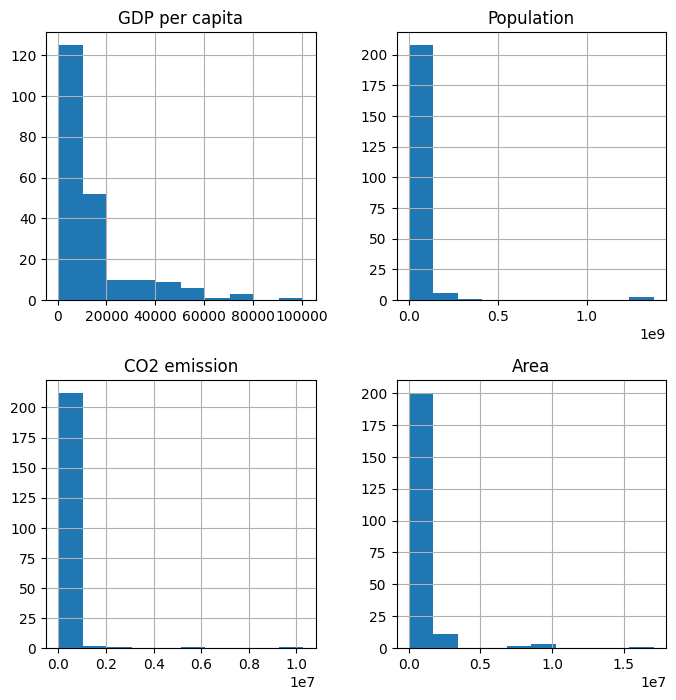

In [119]:
import matplotlib.pyplot as plt
import scipy.stats as stats

df.hist(figsize=(8, 8))

Візуально можно сказати, що дані не є нормально розподілені. Але застосуємо критерій нормальності Шапіро-Уілкса, де рівень значущості буде дорівнювати 0.05

In [120]:
alpha = 0.05

for col in df.columns:
    if df[col].dtype == float:
        stats_per_col, p_per_col = stats.shapiro(df[col])
        print('Column name:', col)
        print(f'Stats value by Shapiro is {round(stats_per_col, 5)}, where is p value is {round(p_per_col, 5)}')

        if p_per_col > alpha:
            print('Data IS normally distributed')
        else:
            print('Data IS NOT normally distributed')
        print()

Column name: GDP per capita
Stats value by Shapiro is 0.73067, where is p value is 0.0
Data IS NOT normally distributed

Column name: Population
Stats value by Shapiro is 0.2171, where is p value is 0.0
Data IS NOT normally distributed

Column name: CO2 emission
Stats value by Shapiro is 0.17369, where is p value is 0.0
Data IS NOT normally distributed

Column name: Area
Stats value by Shapiro is 0.33839, where is p value is 0.0
Data IS NOT normally distributed



# (3)
Перевіримо гіпотезу про рівність середнього і медіани для одного з параметрів

In [121]:
alpha = 0.05

for col in df.columns:
    if df[col].dtype == float:
        stats_per_col, p_per_col = stats.ttest_1samp(df[col], df[col].median())
        print('Column name:', col)

        if p_per_col > alpha:
            print('Expected value and median are the same.')
        else:
            print('Expected value and median are not the same.')
        print()

Column name: GDP per capita
Expected value and median are not the same.

Column name: Population
Expected value and median are not the same.

Column name: CO2 emission
Expected value and median are not the same.

Column name: Area
Expected value and median are not the same.



# (4)
Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального. Побудуємо гітрограми для візуального розуміння.

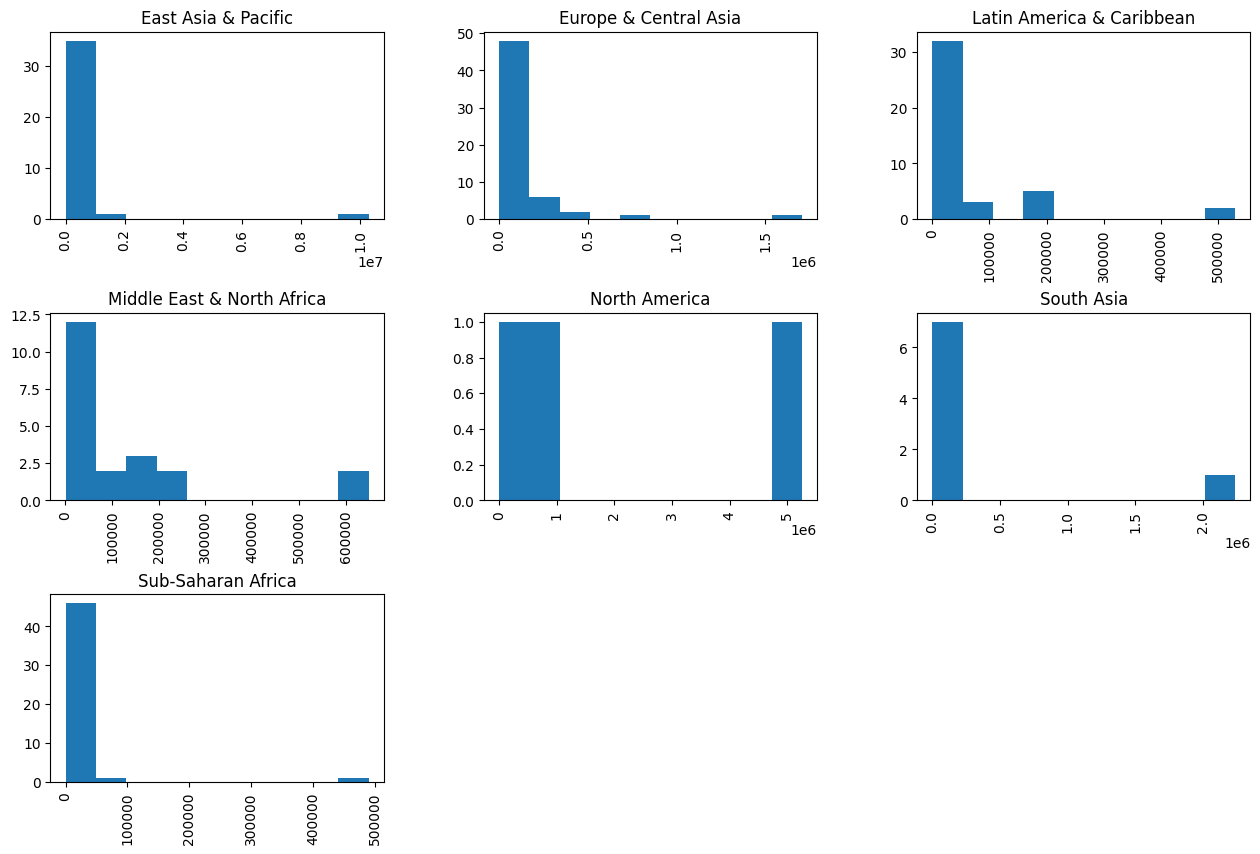

In [122]:
df['CO2 emission'].hist(by=df['Region'], layout=(3, 3), figsize=(15, 10))
plt.show()

In [123]:
for region in df['Region'].unique():
    stats_per_col, p_per_col = stats.shapiro(df[df['Region'] == region]['CO2 emission'])

    print('Region:', region)
    if p_per_col > alpha:
        print(f'For {region} parameter CO2 emission IS normally distributed')
    else:
        print(f'For {region} parameter CO2 emission IS NOT normally distributed')
    print()

Region: South Asia
For South Asia parameter CO2 emission IS NOT normally distributed

Region: Europe & Central Asia
For Europe & Central Asia parameter CO2 emission IS NOT normally distributed

Region: Middle East & North Africa
For Middle East & North Africa parameter CO2 emission IS NOT normally distributed

Region: East Asia & Pacific
For East Asia & Pacific parameter CO2 emission IS NOT normally distributed

Region: Sub-Saharan Africa
For Sub-Saharan Africa parameter CO2 emission IS NOT normally distributed

Region: Latin America & Caribbean
For Latin America & Caribbean parameter CO2 emission IS NOT normally distributed

Region: North America
For North America parameter CO2 emission IS normally distributed



# (5)
Побудувати кругову діаграму населення по регіонам

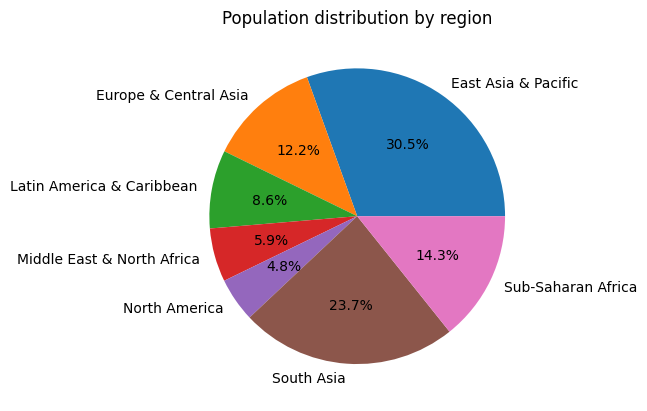

In [124]:
df.groupby('Region')['Population'].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Population distribution by region")
plt.ylabel(None)
plt.show()